<a href="https://colab.research.google.com/github/riyakb/Autoencoders-for-MNIST/blob/master/conv_autoencoder_for_noisy_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

noise_factor = 0.65
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

filt_1=64
filt_2=32
filt_3=16
ker_size=(3,3)
filt_size=(2,2)
enc_func='selu'
dec_func='sigmoid'
opt='adadelta'
los='binary_crossentropy'
no_of_epochs=50
batch=128

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

inp = Input(shape=(28, 28, 1))  
enc_1 = Conv2D(filt_1, ker_size, activation=enc_func, padding='same')(inp) 
enc_2 = MaxPooling2D(filt_size, padding='same')(enc_1)
enc_3 = Conv2D(filt_2, ker_size, activation=enc_func, padding='same')(enc_2) 
enc_4 = MaxPooling2D(filt_size, padding='same')(enc_3) 
enc_5 = Conv2D(filt_3, ker_size, activation=enc_func, padding='same')(enc_4)
enc_6 = MaxPooling2D(filt_size,padding='same')(enc_5) 

dec_1 = Conv2D(filt_3, ker_size, activation=enc_func, padding='same')(enc_6)
dec_2 = UpSampling2D(filt_size)(dec_1)
dec_3 = Conv2D(filt_2, ker_size, activation=enc_func, padding='same')(dec_2)
dec_4 = UpSampling2D(filt_size)(dec_3)
dec_5 = Conv2D(filt_1, ker_size, activation=enc_func)(dec_4)
dec_6 = UpSampling2D(filt_size)(dec_5)
dec_7 = Conv2D(1, ker_size, activation=dec_func, padding='same')(dec_6)

autoencoder = Model(inp, dec_7)

In [0]:
encoder_1 = Model(inp, enc_1)
enc_inp_2 = Input(shape=(28,28,64))
enc_layer_2 = autoencoder.layers[2]
encoder_2 = Model(enc_inp_2, enc_layer_2(enc_inp_2))
enc_inp_3 = Input(shape=(14,14,64))
enc_layer_3 = autoencoder.layers[3]
encoder_3 = Model(enc_inp_3, enc_layer_3(enc_inp_3))
enc_inp_4 = Input(shape=(14,14,32))
enc_layer_4 = autoencoder.layers[4]
encoder_4 = Model(enc_inp_4, enc_layer_4(enc_inp_4))
enc_inp_5 = Input(shape=(7,7,32))
enc_layer_5 = autoencoder.layers[5]
encoder_5 = Model(enc_inp_5, enc_layer_5(enc_inp_5))
enc_inp_6 = Input(shape=(7,7,16))
enc_layer_6 = autoencoder.layers[6]
encoder_6 = Model(enc_inp_6, enc_layer_6(enc_inp_6))

dec_inp_1 = Input(shape=(4,4,16))
dec_layer_1 = autoencoder.layers[7]
decoder_1 =Model(dec_inp_1, dec_layer_1(dec_inp_1))
dec_inp_2 = Input(shape=(4,4,16))
dec_layer_2 = autoencoder.layers[8]
decoder_2 = Model(dec_inp_2, dec_layer_2(dec_inp_2))
dec_inp_3 = Input(shape=(8,8,16))
dec_layer_3 = autoencoder.layers[9]
decoder_3 = Model(dec_inp_3, dec_layer_3(dec_inp_3))
dec_inp_4 = Input(shape=(8,8,32))
dec_layer_4 = autoencoder.layers[10]
decoder_4 = Model(dec_inp_4, dec_layer_4(dec_inp_4))
dec_inp_5 = Input(shape=(16,16,32))
dec_layer_5 = autoencoder.layers[11]
decoder_5 = Model(dec_inp_5, dec_layer_5(dec_inp_5))
dec_inp_6 = Input(shape=(14,14,64))
dec_layer_6 = autoencoder.layers[12]
decoder_6 = Model(dec_inp_6, dec_layer_6(dec_inp_6))
dec_inp_7 = Input(shape=(28,28,64))
dec_layer_7 = autoencoder.layers[13]
decoder_7 = Model(dec_inp_7, dec_layer_7(dec_inp_7))


In [5]:
autoencoder.compile(optimizer=opt, loss=los)
autoencoder.fit(x_train_noisy, x_train, epochs=no_of_epochs, batch_size=batch, shuffle=True, validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 18s 295us/step - loss: 0.2276 - val_loss: 0.1751
Epoch 2/50
60000/60000 [==============================] - 16s 262us/step - loss: 0.1667 - val_loss: 0.1561
Epoch 3/50
60000/60000 [==============================] - 16s 262us/step - loss: 0.1531 - val_loss: 0.1429
Epoch 4/50
60000/60000 [==============================] - 16s 263us/step - loss: 0.1459 - val_loss: 0.1399
Epoch 5/50
60000/60000 [==============================] - 16s 262us/step - loss: 0.1416 - val_loss: 0.1407
Epoch 6/50
60000/60000 [==============================] - 16s 263us/step - loss: 0.1385 - val_loss: 0.1335
Epoch 7/50
60000/60000 [==============================] - 16s 263us/step - loss: 0.1357 - val_loss: 0.1379
Epoch 8/50
60000/60000 [==============================] - 16s 262us/step - loss: 0.1338 - val_loss: 0.1329
Epoch 9/50
60000/60000 [==============================] - 16s 262us/step - loss: 0.1324 - val_

In [0]:
encoded_imgs_1 = encoder_1.predict(x_test_noisy)
encoded_imgs_2 = encoder_2.predict(encoded_imgs_1)
encoded_imgs_3 = encoder_3.predict(encoded_imgs_2)
encoded_imgs_4 = encoder_4.predict(encoded_imgs_3)
encoded_imgs_5 = encoder_5.predict(encoded_imgs_4)
encoded_imgs_6 = encoder_6.predict(encoded_imgs_5)
decoded_imgs_1 = decoder_1.predict(encoded_imgs_6)
decoded_imgs_2 = decoder_2.predict(decoded_imgs_1)
decoded_imgs_3 = decoder_3.predict(decoded_imgs_2)
decoded_imgs_4 = decoder_4.predict(decoded_imgs_3)
decoded_imgs_5 = decoder_5.predict(decoded_imgs_4)
decoded_imgs_6 = decoder_6.predict(decoded_imgs_5)
decoded_imgs_7 = decoder_7.predict(decoded_imgs_6)

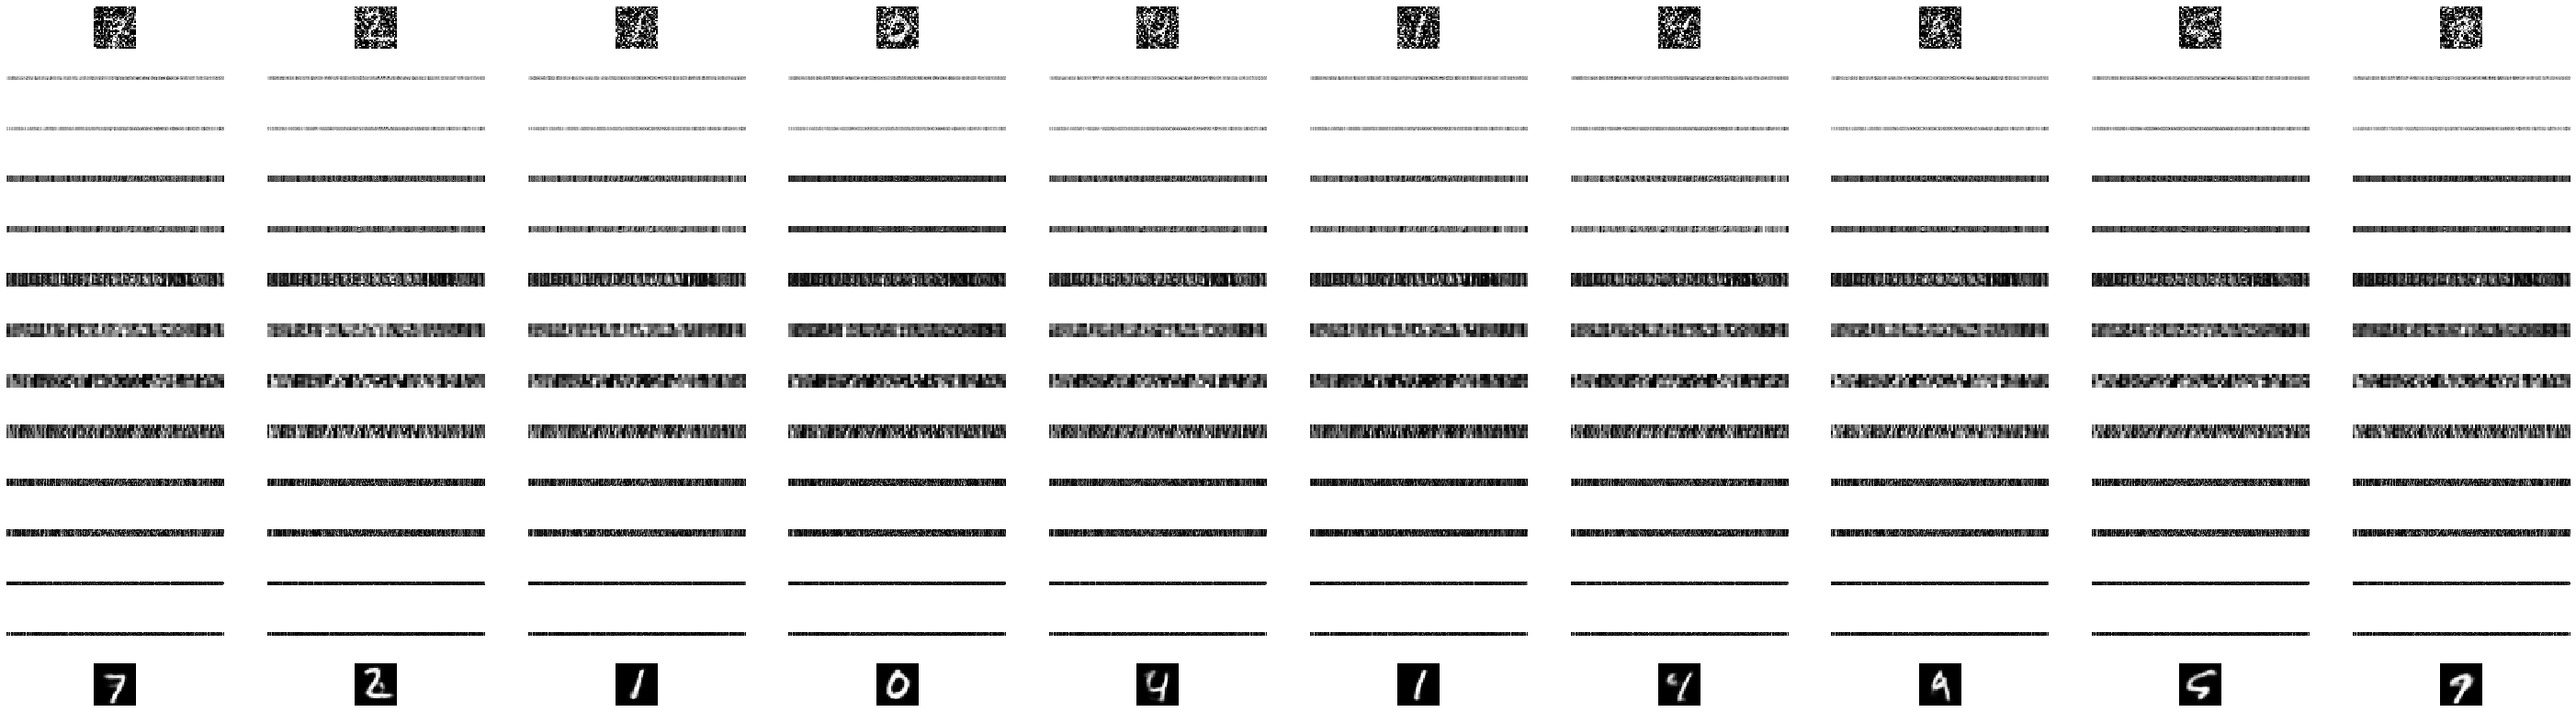

In [7]:
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(50, 14))
for i in range(n):
  
    ax = plt.subplot(14, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(14, n, i + 1 + n)
    plt.imshow(encoded_imgs_1[i].reshape(28,28*64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(14, n, i + 1 + 2*n)
    plt.imshow(encoded_imgs_2[i].reshape(14,14*64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(14, n, i + 1 + 3*n)
    plt.imshow(encoded_imgs_3[i].reshape(14,14*32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(14, n, i + 1 + 4*n)
    plt.imshow(encoded_imgs_4[i].reshape(7,7*32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(14, n, i + 1 + 5*n)
    plt.imshow(encoded_imgs_5[i].reshape(7,7*16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(14, n, i + 1 + 6*n)
    plt.imshow(encoded_imgs_6[i].reshape(4,4*16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(14, n, i + 1 + 7*n)
    plt.imshow(decoded_imgs_1[i].reshape(4,4*16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(14, n, i + 1 + 8*n)
    plt.imshow(decoded_imgs_2[i].reshape(8,8*16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(14, n, i + 1 + 9*n)
    plt.imshow(decoded_imgs_3[i].reshape(8,8*32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(14, n, i + 1 + 10*n)
    plt.imshow(decoded_imgs_4[i].reshape(16,16*32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(14, n, i + 1 + 11*n)
    plt.imshow(decoded_imgs_5[i].reshape(14,14*64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(14, n, i + 1 + 12*n)
    plt.imshow(decoded_imgs_6[i].reshape(28,28*64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(14, n, i + 1 + 13*n)
    plt.imshow(decoded_imgs_7[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()